# Capstone Project

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
from sklearn.cluster import DBSCAN  
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
import statistics

%matplotlib inline
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library

print('Libraries imported.')

Libraries imported.


In [2]:
CLIENT_ID = '53MEWXLELYFWGTLPUO31J35LKVTTU3EDWCLFSFJFAP23MCW5' # your Foursquare ID
CLIENT_SECRET = 'FPNTKVYTVVD0WCTNTE4TJPO0IDQ4QTLO4LMYFPNFBD2BT2ZF' # your Foursquare Secret
VERSION = '20200807'
LIMIT = 3000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

error429 = {'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5f33d62ecf2d854abd37e10e'}, 'response': {}}

Your credentails:
CLIENT_ID: 53MEWXLELYFWGTLPUO31J35LKVTTU3EDWCLFSFJFAP23MCW5
CLIENT_SECRET:FPNTKVYTVVD0WCTNTE4TJPO0IDQ4QTLO4LMYFPNFBD2BT2ZF


In [3]:
# Set parameters for venue search
categoryIds = ['4bf58dd8d48988d142941735', # 'Asian Restaurants'
    '4bf58dd8d48988d145941735', # 'Chinese Restaurants'
    '4bf58dd8d48988d111941735', # 'Japanese Restaurants'
    '4bf58dd8d48988d113941735'] # 'Korean Restaurants'
# Category ids taken from https://developer.foursquare.com/docs/build-with-foursquare/categories/

radius = 1000
# Radius for search at each postcode

In [4]:
postcodes = ['SW3', 'SW5', 'SW6', 'SW7', 'SW10', 'W2', 'W6', 'W8', 'W9', 'W10', 'W11', 'W12', 'W14']

In [5]:
venues_df = pd.DataFrame(columns = ['id', 'name', 'category', 'postcode', 'location.lat', 'location.lng'])
count = 0
for b in range(len(categoryIds)):
    for x in range(len(postcodes)):
        address = "London, " + postcodes[x]
        categoryId = categoryIds[int(b)]
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&categoryId={}&near={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, categoryId, address, radius, LIMIT)
        results = requests.get(url).json()
        venues = results['response']['venues']
        dataframe = pd.json_normalize(venues)
        filtered_columns = ['id', 'name', 'categories', 'location.postalCode', 'location.lat', 'location.lng']
        if dataframe.shape != (0, 0):
            dataframe_filtered = dataframe.loc[:, filtered_columns]
            for y in range(len(dataframe_filtered.index)):
                a = dataframe.iloc[y,2]
                a0 = a[0]
                category = a0['name']    
                venues_df.loc[count] = [dataframe_filtered.iloc[y, 0], dataframe_filtered.iloc[y, 1], category, postcodes[x], dataframe_filtered.iloc[y, 4], dataframe_filtered.iloc[y, 5]]
                count += 1
venues_df = venues_df.reset_index(drop=True)

In [6]:
venues_df.head()

,id,name,category,postcode,location.lat,location.lng
0,4b8678d8f964a5208f8b31e3,Phật Phúc Noodle Bar,Vietnamese Restaurant,SW3,51.487620,-0.169044
1,4c893c19bbec6dcbea8bda58,Feng Sushi,Sushi Restaurant,SW3,51.485439,-0.181771
2,568e9345498eb6c01aa9e930,Oka Chelsea,Japanese Restaurant,SW3,51.486224,-0.172009
3,5b426357625a66002c59c0c4,Bo Lang,Dim Sum Restaurant,SW3,51.493369,-0.167038
4,521bd61a498e89cd7f120799,Dll's Tableً @ novikov rest,Asian Restaurant,SW3,51.497311,-0.168248
...,...,...,...,...,...,...
1043,5b2e7f098c812a002caaffc6,Bullgogi,Korean Restaurant,W11,51.508483,-0.199608
1044,5f2e80897f749c2d2edd4de5,Seoul Bird,Korean Restaurant,W11,51.507812,-0.221343
1045,5f2e80897f749c2d2edd4de5,Seoul Bird,Korean Restaurant,W12,51.507812,-0.221343
1046,5cd0217a49cf930032f46f3e,Simya,Korean Restaurant,W14,51.491990,-0.224490


In [28]:
venues_df.shape

(381, 8)

In [8]:
# remove duplicates
id_list = []
drop_list = []
count = 0
for venues_row in range(len(venues_df['id'])):
    if venues_df.iloc[venues_row, 0] in id_list:
        count += 1
        drop_list.append(venues_row)
    id_list.append(venues_df.iloc[venues_row, 0])
print(venues_df.shape)
venues_df = venues_df.drop(drop_list)
print(venues_df.shape)
venues_df = venues_df.reset_index(drop=True)

(1048, 6)
(381, 6)


In [29]:
venues_df

,id,name,category,postcode,location.lat,location.lng,label,core samples mask
0,4b8678d8f964a5208f8b31e3,Phật Phúc Noodle Bar,Vietnamese Restaurant,SW3,51.487620,-0.169044,0,True
1,4c893c19bbec6dcbea8bda58,Feng Sushi,Sushi Restaurant,SW3,51.485439,-0.181771,1,True
2,568e9345498eb6c01aa9e930,Oka Chelsea,Japanese Restaurant,SW3,51.486224,-0.172009,0,True
3,5b426357625a66002c59c0c4,Bo Lang,Dim Sum Restaurant,SW3,51.493369,-0.167038,0,True
4,521bd61a498e89cd7f120799,Dll's Tableً @ novikov rest,Asian Restaurant,SW3,51.497311,-0.168248,0,True
...,...,...,...,...,...,...,...,...
376,5db2e5ff277f1b0008dbbb68,Sushi Daily,Sushi Restaurant,W9,51.517437,-0.165963,8,True
377,51e80884498eb9f9cb01582b,Kurobuta,Japanese Restaurant,W9,51.514765,-0.166249,8,True
378,5cd06c6ac97f28002c738f83,Mikawa Sushi,Sushi Restaurant,W12,51.503012,-0.223715,13,True
379,5851e074dc33295488c43835,Simya Korean Kitchen,Korean Restaurant,SW5,51.489058,-0.190979,2,True


In [10]:
#Create map
address = 'London, United Kingdom'
geolocator = Nominatim(user_agent="ln_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))
map_london = folium.Map(location = [latitude, longitude], zoom_start = 12)

# Add markers to map
for lat, lng, name, category, postcode in zip(venues_df['location.lat'], venues_df['location.lng'], venues_df['name'], venues_df['category'], venues_df['postcode']):
    label = '{}, {} - {}'.format(name, category, postcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_london)  
    
display(map_london)

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [11]:
epsilon = 0.0035
minimumSamples = 4
X = np.column_stack((venues_df['location.lat'], venues_df['location.lng']))
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
venues_df['label'] = labels
colours = {-1 : "black", 0: "blue", 1: "green", 2: "red", 3: "cyan", 4: "magenta", 5: "yellow", 6: "white", 7: "blue", 8: "green", 9: "red", 10: "cyan", 11: "magenta", 12: "yellow", 13: "white", 14: "blue", 15: "green", 16:"red", 17:"cyan", 18:"magenta", 19:"yellow", 20:"white"}
venues_df

,id,name,category,postcode,location.lat,location.lng,label
0,4b8678d8f964a5208f8b31e3,Phật Phúc Noodle Bar,Vietnamese Restaurant,SW3,51.487620,-0.169044,0
1,4c893c19bbec6dcbea8bda58,Feng Sushi,Sushi Restaurant,SW3,51.485439,-0.181771,1
2,568e9345498eb6c01aa9e930,Oka Chelsea,Japanese Restaurant,SW3,51.486224,-0.172009,0
3,5b426357625a66002c59c0c4,Bo Lang,Dim Sum Restaurant,SW3,51.493369,-0.167038,0
4,521bd61a498e89cd7f120799,Dll's Tableً @ novikov rest,Asian Restaurant,SW3,51.497311,-0.168248,0
...,...,...,...,...,...,...,...
376,5db2e5ff277f1b0008dbbb68,Sushi Daily,Sushi Restaurant,W9,51.517437,-0.165963,8
377,51e80884498eb9f9cb01582b,Kurobuta,Japanese Restaurant,W9,51.514765,-0.166249,8
378,5cd06c6ac97f28002c738f83,Mikawa Sushi,Sushi Restaurant,W12,51.503012,-0.223715,13
379,5851e074dc33295488c43835,Simya Korean Kitchen,Korean Restaurant,SW5,51.489058,-0.190979,2


In [12]:
# First, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
venues_df['core samples mask'] = core_samples_mask

In [13]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

14

In [14]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [15]:
venues_df.iloc[2,6]

0

In [16]:
# Show clusters on map
map_london = folium.Map(location = [latitude, longitude], zoom_start = 12)
for lat, lng, name, category, postcode, label in zip(venues_df['location.lat'], venues_df['location.lng'], venues_df['name'], venues_df['category'], venues_df['postcode'], venues_df['label']):
    label2 = '{}, {} - {}, cluster {}'.format(name, category, postcode, label)
    COLOR = colours[label]
    label2 = folium.Popup(label2, parse_html=True)
    if category == 'Korean Restaurant':
        FILL_COLOR='red'
        print('True')
    else:
        FILL_COLOR='blue'
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color=COLOR,
        fill=True,
            fill_color=FILL_COLOR,
            fill_opacity=0.7).add_to(map_london)
display(map_london)

True
True
True
True
True
True
True
True
True


In [17]:
# Create new data frames for each cluster for analysis
cluster_list = []
for cluster in range(len(unique_labels) - 1):
    cluster_name = 'cluster_{}'.format(cluster)
    exec(cluster_name + " = pd.DataFrame(columns = ['id', 'name', 'category', 'postcode'])")
    for master_row in range(len(venues_df['id'])):
        if venues_df.iloc[master_row, 6] == cluster:
            row_string = ".loc[{}] = venues_df.iloc[{}, 0], venues_df.iloc[{}, 1], venues_df.iloc[{}, 2], venues_df.iloc[{}, 3]".format(master_row, master_row, master_row, master_row, master_row)
            exec(cluster_name + row_string)
    exec(cluster_name + " = " + cluster_name + ".reset_index(drop=True)")
    exec("cluster_list.append(" + cluster_name + ")")

In [18]:
cluster_list[1]

,id,name,category,postcode
0,4c893c19bbec6dcbea8bda58,Feng Sushi,Sushi Restaurant,SW3
1,5d769b0332ab480008ff0950,Kurobuta,Japanese Restaurant,SW3
2,4bcf001bb6c49c7475f59791,Yumenoki,Japanese Restaurant,SW3
3,553c1422498e67e9198a870c,Maze Grill,Steakhouse,SW3
4,4ac518daf964a520cea820e3,Wok Wok,Chinese Restaurant,SW3
5,4db94db56a2334682da48483,Hoi An,Vietnamese Restaurant,SW3
6,544cfe02498eac061c50aa77,Rosa's Thai Cafe,Thai Restaurant,SW3
7,508aca76e4b00ac3c670546d,Thai cuisine,Thai Restaurant,SW5


In [19]:
# For each cluster, calculate what percenrtage of asian restaurants are korean restaurants

pc_list = []
for x in range(len(cluster_list)):
    nk = 0 
    for y in range(len((cluster_list[x])['id'])):
        if (cluster_list[x]).iloc[y, 2] == 'Korean Restaurant':
            nk += 1
    pc_list.append((nk / len((cluster_list[x])['id'])) * 100 )
print(pc_list)
pc_df = pd.DataFrame(columns = ['Percentage'])
for y in range(len(pc_list)):
    pc_df.loc[y] = pc_list[y]
pc_df

[0.0, 0.0, 4.651162790697675, 0.0, 20.0, 0.0, 0.0, 6.25, 3.0303030303030303, 0.0, 4.761904761904762, 0.0, 0.0, 2.631578947368421]


,Percentage
0,0.000000
1,0.000000
2,4.651163
3,0.000000
4,20.000000
5,0.000000
6,0.000000
7,6.250000
8,3.030303
9,0.000000


<function matplotlib.pyplot.show(*args, **kw)>

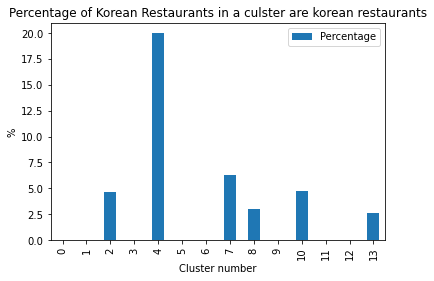

In [30]:
# Bar Chart
pc_df.plot(kind = 'bar')

plt.title('Percentage of Korean Restaurants in a culster are korean restaurants')
plt.xlabel('Cluster number')
plt.ylabel('%')
plt.show


In [21]:
ra_list = []
pa_list = []
rll = []
for x in range(len(cluster_list)):
    r_list = []
    p_list = []
    for y in range(len(cluster_list[x])):
        VENUE_ID = (cluster_list[x]).iloc[y, 0]
        url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(VENUE_ID, CLIENT_ID, CLIENT_SECRET, VERSION)
        results = requests.get(url).json()
        if (results['meta'])['code'] == 429:
            print('Error : Request limit exceeded')
            break
        else:
            if 'rating' in results['response']['venue']:
                rating = results['response']['venue']['rating']
                r_list.append(rating)
            if 'price' in results['response']['venue']:
                price = (results['response']['venue']['price'])['tier']
                p_list.append(price)
    if (results['meta'])['code'] == 429:
        break
    else:
        ra = statistics.mean(r_list)
        ra_list.append(ra)
        pa = statistics.mean(p_list)
        pa_list.append(pa)
    rll.append(r_list)
    pll.append(p_list)

<function matplotlib.pyplot.show(*args, **kw)>

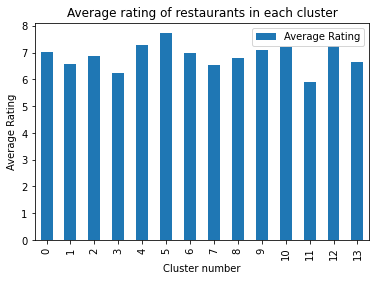

In [72]:
ra_df = pd.DataFrame(columns = ['Average Rating'])
for y in range(len(ra_list)):
   ra_df.loc[y] = ra_list[y]
    
ra_df.plot(kind = 'bar')
plt.title('Average rating of restaurants in each cluster')
plt.xlabel('Cluster number')
plt.ylabel('Average Rating')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

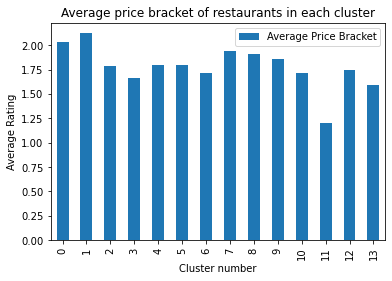

In [73]:
pa_df = pd.DataFrame(columns = ['Average Price Bracket'])
for y in range(len(pa_list)):
   pa_df.loc[y] = pa_list[y]
    
pa_df.plot(kind = 'bar')
plt.title('Average price bracket of restaurants in each cluster')
plt.xlabel('Cluster number')
plt.ylabel('Average Rating')
plt.show

In [66]:
pa_df

,Average Price Bracket
0,2.035088
1,2.125000
2,1.785714
3,1.666667
4,1.800000
5,1.800000
6,1.714286
7,1.937500
8,1.909091
9,1.857143


Our ideal cluster has 0% Korean Restaurants an average price bracket of 2 and an average rating of 10.
We can calculate each clusters deviation from this state.

In [69]:
error_list = []
ideal_pc = 0
ideal_rating = 10
ideal_price = 1.9
for x in range(len(pa_df)):
    error_pc = (pc_df.iloc[x, 0] - ideal_pc) / 100
    error_pa = (pa_df.iloc[x, 0] - ideal_price) / 2
    error_ra = (ra_df.iloc[x, 0] - ideal_rating) / 10
    euclidian_error = ((error_pc ** 2) + (error_pa ** 2) + (error_ra ** 2) ** .5)
    error_list.append(euclidian_error)

In [70]:
error_list

[0.30367982003512395,
 0.35515625,
 0.3183453043196727,
 0.3896111111111111,
 0.3125,
 0.22916666666666666,
 0.31093014128728413,
 0.3498133680555556,
 0.3216056014692379,
 0.2904591836734694,
 0.29165925344496774,
 0.5325,
 0.28229166666666666,
 0.36183393399725866]

<function matplotlib.pyplot.show(*args, **kw)>

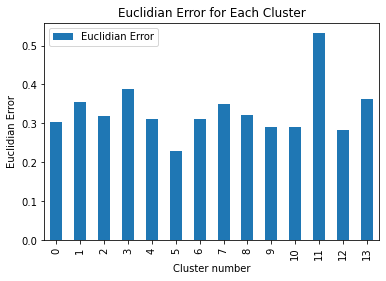

In [71]:
error_df = pd.DataFrame(columns = ['Euclidian Error'])
for y in range(len(error_list)):
   error_df.loc[y] = error_list[y]

error_df.plot(kind = 'bar')
plt.title('Euclidian Error for Each Cluster')
plt.xlabel('Cluster number')
plt.ylabel('Euclidian Error')
plt.show

In [60]:
error_df


,Euclidian Error
0,0.103288
1,0.143712
2,0.100131
3,0.145820
4,0.112900
5,0.051378
6,0.093227
7,0.128041
8,0.106721
9,0.084916


Therefore we can conclude that cluster 5 is the best place for our client to open their new Korean restaurant.